#**Praticando Python para Data Science: Challenge Alura Store 🏪**


> *Neste desafio, analisam-se dados de vendas, desempenho e avaliações das quatro lojas da Alura Store para identificar a unidade menos eficiente e recomendar qual deve ser vendida. Para isso, utilizam-se a biblioteca Pandas para carregar e manipular arquivos CSV, a Matplotlib para criar visualizações e diferentes métricas, como faturamento, avaliações e performance de vendas, para embasar a decisão final.*


---

## Load libs ⏬


In [40]:
import pandas as pd

In [41]:
import matplotlib.pyplot as plt

In [42]:
import seaborn as sns

## Environment Confgs 🌳

In [43]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

df_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


---


## 01 - Análise do Faturamento 🔎




> Nesta primeira análise, deve-se calcular o faturamento total de cada loja. Somando os valores da coluna Preço de cada loja para estimar o faturamento.

In [44]:
fat_loja1 = loja['Preço'].sum()
fat_loja2 = loja2['Preço'].sum()
fat_loja3 = loja3['Preço'].sum()
fat_loja4 = loja4['Preço'].sum()

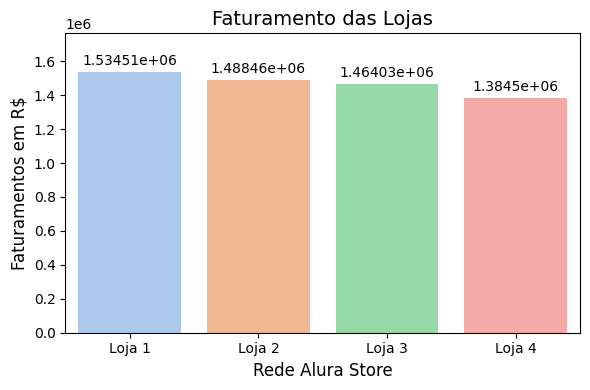

In [45]:
plt.figure(figsize=(6, 4))

ax = sns.barplot(
    x=['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    y=[fat_loja1, fat_loja2, fat_loja3, fat_loja4],
    palette='pastel',
    hue=['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
)

for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.ylim(0, max([fat_loja1, fat_loja2, fat_loja3, fat_loja4]) * 1.15)

plt.title('Faturamento das Lojas', fontsize=14)
plt.xlabel('Rede Alura Store', fontsize=12)
plt.ylabel('Faturamentos em R$', fontsize=12)
plt.tight_layout()
plt.show()

---


## 02 - Vendas por Categoria 💸




> Neste passo, deve calcular a quantidade de produtos vendidos por categoria em cada loja. A ideia é agrupar os dados por categoria e contar o número de vendas de cada tipo, mostrando as categorias mais populares de cada loja.

In [47]:
vendas_categoria = df_lojas.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='Quantidade')

top_categorias = vendas_categoria.sort_values(by=['Loja', 'Quantidade'], ascending=[True, False])

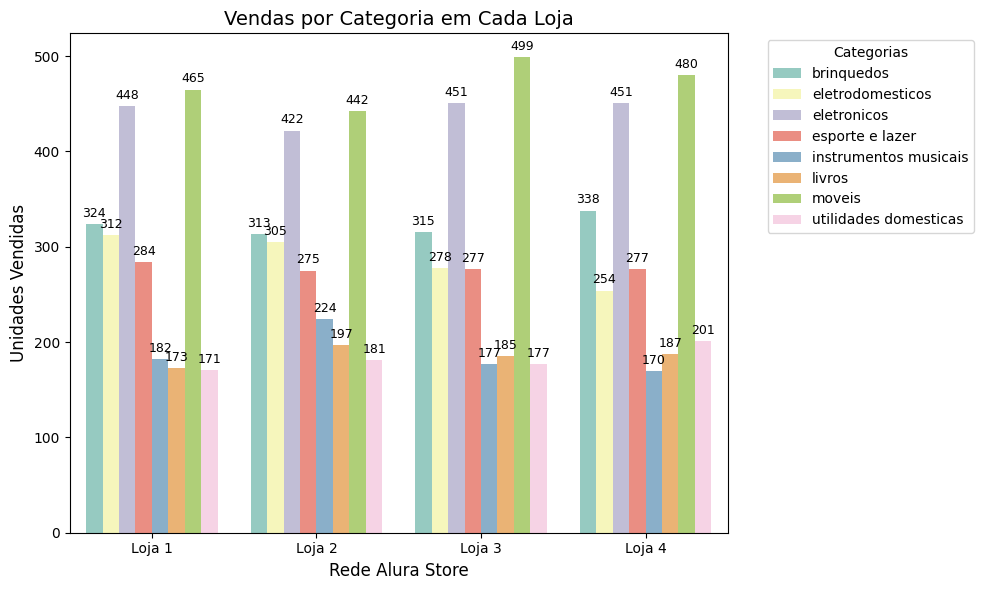

In [84]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=vendas_categoria,
    x='Loja',
    y='Quantidade',
    hue='Categoria do Produto',
    palette='Set3'
)

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)

plt.title('Vendas por Categoria em Cada Loja', fontsize=14)
plt.xlabel('Rede Alura Store', fontsize=12)
plt.ylabel('Unidades Vendidas', fontsize=12)
plt.legend(title='Categorias', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

---


## 03 - Média de Avaliação das Lojas ⭐




> Neste passo, vamos calcular a média das avaliações dos clientes para cada loja. O objetivo é entender a satisfação dos clientes com os produtos vendidos.

In [59]:
media_avaliacao = df_lojas.groupby('Loja')['Avaliação da compra'].mean().reset_index()
media_avaliacao

,Loja,Avaliação da compra
0,Loja 1,3.976685
1,Loja 2,4.037304
2,Loja 3,4.048326
3,Loja 4,3.995759


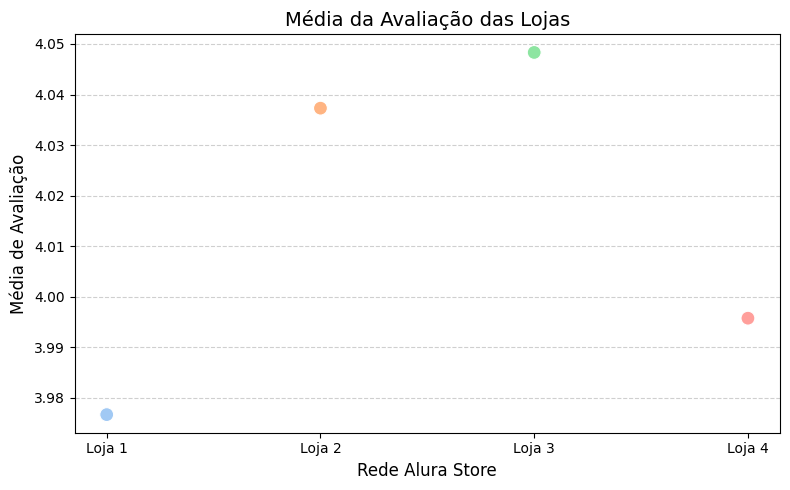

In [77]:
plt.figure(figsize=(8, 5))

ax = sns.scatterplot(
    data = media_avaliacao,
    x = 'Loja',
    y = 'Avaliação da compra',
    hue = 'Loja',
    palette = 'pastel',
    s= 100,
    legend=False
)


plt.title('Média da Avaliação das Lojas', fontsize=14)
plt.xlabel('Rede Alura Store', fontsize=12)
plt.ylabel('Média de Avaliação', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

---


## 04 - Produtos Mais e Menos Vendidos 🛍️




> Neste passo, deve identificar quais produtos foram os mais vendidos e os menos vendidos em cada loja.  Ao final, visualize os resultados de forma que fique claro quais produtos se destacaram nas vendas de cada loja.

In [92]:
produtos_vendidos = df_lojas.groupby(['Loja', 'Produto']).size().reset_index(name='Quantidade')


mais_vendidos = produtos_vendidos.sort_values('Quantidade', ascending=False).drop_duplicates('Loja', keep='first').sort_values('Loja')
menos_vendidos = produtos_vendidos.sort_values('Quantidade', ascending=True).drop_duplicates('Loja', keep='first').sort_values('Loja')

destaques_produtos = pd.concat([mais_vendidos, menos_vendidos], ignore_index=True)
destaques_produtos

,Loja,Produto,Quantidade
0,Loja 1,Guarda roupas,60
1,Loja 2,Iniciando em programação,65
2,Loja 3,Kit banquetas,57
3,Loja 4,Cama box,62
4,Loja 1,Celular ABXY,33
5,Loja 2,Jogo de tabuleiro,32
6,Loja 3,Blocos de montar,35
7,Loja 4,Guitarra,33


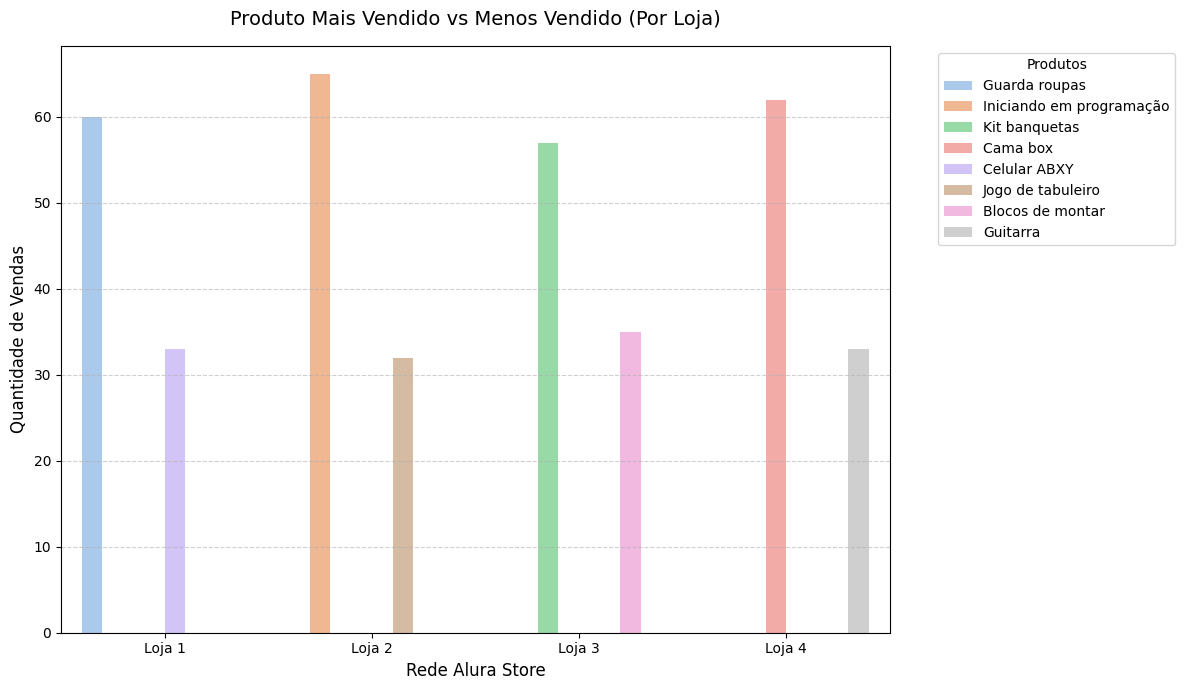

In [96]:
plt.figure(figsize=(12, 7))

ax = sns.barplot(
    data=destaques_produtos,
    x='Loja',
    y='Quantidade',
    hue='Produto',
    palette='pastel'
)

plt.title('Produto Mais Vendido vs Menos Vendido (Por Loja)', fontsize=14, pad=15)
plt.xlabel('Rede Alura Store', fontsize=12)
plt.ylabel('Quantidade de Vendas', fontsize=12)
plt.legend(title='Produtos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

---


## 05 - Frete Médio por Loja 🚚




> Neste passo, deve identificar quais produtos foram os mais vendidos e os menos vendidos em cada loja.  Ao final, visualize os resultados de forma que fique claro quais produtos se destacaram nas vendas de cada loja.

In [97]:
frete_medio = df_lojas.groupby('Loja')['Frete'].mean().reset_index()
frete_medio

,Loja,Frete
0,Loja 1,34.691805
1,Loja 2,33.621941
2,Loja 3,33.074464
3,Loja 4,31.278997


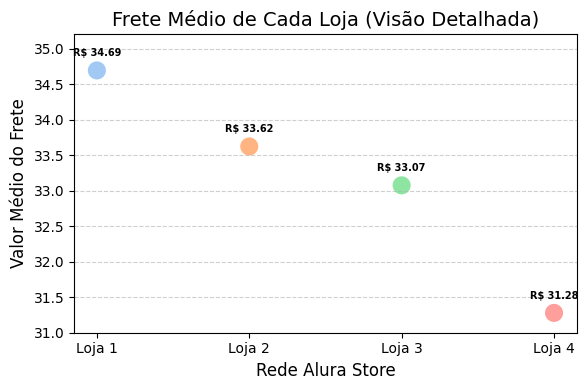

In [111]:
plt.figure(figsize=(6, 4))

ax = sns.scatterplot(
    data=frete_medio,
    x='Loja',
    y='Frete',
    palette='pastel',
    hue='Loja',
    s=200,
    legend=False
)

for i, valor in enumerate(frete_medio['Frete']):
    ax.text(
        i,
        valor + 0.2,
        f'R$ {valor:.2f}',
        ha='center',
        fontsize= 7,
        fontweight='bold'
    )

plt.title('Frete Médio de Cada Loja (Visão Detalhada)', fontsize=14)
plt.xlabel('Rede Alura Store', fontsize=12)
plt.ylabel('Valor Médio do Frete', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.ylim(31, 35.2)
plt.show()



---

# **Relatório Final 💡**

#1. Introdução
O presente relatório sintetiza a análise de dados das quatro filiais da Rede Alura Store. O objetivo principal é fornecer embasamento analítico para a decisão estratégica do Senhor João a respeito de qual unidade da rede deve ser vendida. A análise levou em consideração o faturamento bruto, a satisfação do cliente (avaliações), os custos logísticos (frete) e a tração de categorias e produtos.

#2. Apresentação dos Resultados
* Faturamento e Saúde Financeira: Observa-se uma disparidade clara na capacidade de geração de receita entre as pontas da rede. A Loja 1 lidera o faturamento com aproximadamente 1,53 Milhões, enquanto a Loja 4 amarga a última posição, faturando cerca de 1,39 Milhões — uma diferença expressiva que impacta o fluxo de caixa geral da empresa.

* Experiência do Cliente (Avaliações): Em termos de satisfação, a Loja 3 (4.05) e a Loja 2 (4.04) apresentam excelência no atendimento. O ponto crítico de qualidade reside na Loja 1, que obteve a nota mais baixa da rede (3.98), indicando que o alto volume de vendas está gerando atrito ou insatisfação no pós-venda.

* Eficiência Logística (Frete Médio): O custo logístico explica parte da insatisfação dos clientes da Loja 1, que possui o frete médio mais caro (34,69). Curiosamente, a Loja 4 possui a operação de entrega mais barata (31,28), uma vantagem competitiva que, infelizmente, não está se refletindo em vendas.

* Desempenho de Produtos:
  * A Loja 1 tem sucesso na categoria de móveis pesados (Guarda roupas), mas falha em eletrônicos (Celular ABXY).
  * A Loja 2 tem seu grande trunfo em educação (Iniciando em programação), com pouca saída para Jogos de tabuleiro.
  * A Loja 3 concentra sua força em móveis (Kit banquetas), com pouca saída para Blocos de montar.
  * A Loja 4 atrai público para o quarto (Cama box), mas tem extrema dificuldade em escoar instrumentos musicais (Guitarra).

#3. Conclusão
Com base no cruzamento das métricas apresentadas, a recomendação oficial para o Senhor João é a venda e repasse da Loja 4.

* A Loja 4 apresenta um quadro de ineficiência comercial grave. Apesar de possuir a maior vantagem logística da rede (o frete mais barato para o cliente final) e manter uma avaliação mediana (4.00), ela é incapaz de converter esses fatores em receita, resultando no pior faturamento de toda a Alura Store. A incapacidade de gerar volume financeiro, mesmo com atrativos, indica que o ponto comercial perdeu tração ou possui uma incompatibilidade profunda com o público da região.

Vender a Loja 4 estancará esse custo de oportunidade. Com o capital da venda, o Sr. João é fortemente aconselhado a investir na correção da operação logística da Loja 1, que é a "galinha dos ovos de ouro" da rede, mas corre sérios riscos a longo prazo por conta do seu frete abusivo e baixa satisfação dos clientes.